## Import libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.svm import SVR
from scipy import signal, sparse 
from scipy.sparse.linalg import spsolve
from scipy.signal import argrelmax
from scipy.ndimage.filters import gaussian_filter1d
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks, peak_prominences
from scipy.signal import chirp, find_peaks, peak_widths

### Matlab file to CSV Conversion


In [2]:
# #Matlab file to CSV Conversion

# data1 = loadmat("data/file/Y_new.mat")
# for i in data1:
#     if '__' not in i and 'readme' not in i:
#         np.savetxt(("data/file/Y_new.csv"),data1[i],delimiter=',')

# data2 = loadmat("data/file/Y_old.mat")        
# for j in data2:
#     if '__' not in j and 'readme' not in j:
#         np.savetxt(("data/file/Y_old.csv"),data2[j],delimiter=',')   


### Load CSV Data


In [3]:
X_train = pd.read_csv('data/train/x_train.csv')
y_train = pd.read_csv('data/train/y_train.csv')

x_test = pd.read_csv('data/test/x_test.csv')
y_test = pd.read_csv('data/test/y_test.csv')

## *Preprocessing Training data


In [4]:
                   #################################### X-TRAIN   ##################################
#Apply 1st Gaussian   
gauss_tr = gaussian_filter(X_train,sigma=0.5,cval=0.5, truncate=4.0)

def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.csc_matrix(np.diff(np.eye(L), 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z


#Baseline Correction ALS

asx_tr =[]
Corrected_base_tr =[]
for i in range(len(gauss_tr)):
    asx_tr.append(gauss_tr[i].flatten())
    base_tr=asx_tr[i]-baseline_als(asx_tr[i], 1000, 0.05)
    Corrected_base_tr.append(base_tr)


#Apply 2nd Gaussian      
gauss_2_tr = gaussian_filter(Corrected_base_tr,sigma=0.5,cval=0.5, truncate=4.0)



#Derivatives
signal_1stdev_tr =[]
signal_2nddev_tr =[]
smoothed_signal_tr =[]
c=0
for i in range(len(gauss_2_tr)):
    fstdev_tr = (np.gradient(gauss_2_tr[i]))
    signal_1stdev_tr.append(fstdev_tr)
    second_dev_tr = np.gradient(fstdev_tr)
    signal_2nddev_tr.append(second_dev_tr)
    sm_signal_tr = gaussian_filter1d(second_dev_tr, 2.4)
    smoothed_signal_tr.append(sm_signal_tr)
    c=c+1
    
#Peak Detection   
xpeak, _ = find_peaks(smoothed_signal_tr[0], distance=1)
yheight = peak_prominences(smoothed_signal_tr[0], xpeak)[0]

xpeak =[]
yheight =[]


for i in range(len(smoothed_signal_tr)):
    peak, _ = find_peaks(smoothed_signal_tr[i], distance=1)
    xpeak.append(peak)
    height=peak_prominences(smoothed_signal_tr[i], peak)[0]
    yheight.append(height)

## *Preprocessing testing Data


In [4]:
#                    #################################### X-Test   ##################################
# #Apply 1st Gaussian   
gauss_1_ts = gaussian_filter(x_test,sigma=0.5,cval=0.5, truncate=4.0)

def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.csc_matrix(np.diff(np.eye(L), 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z


#Baseline Correction ALS

asx =[]
Corrected_base_ts  =[]
for i in range(len(gauss_1_ts )):
    asx.append(gauss_1_ts[i].flatten())
    base=asx[i]-baseline_als(asx[i], 1000, 0.05)
    Corrected_base_ts .append(base)

#Apply 2nd Gaussian      
gauss_2_ts = gaussian_filter(Corrected_base_ts,sigma=0.5,cval=0.5, truncate=4.0)


#Derivatives
signal_1stdev_ts  =[]
signal_2nddev_ts  =[]
smoothed_signal_ts  =[]
c=0
for i in range(len(gauss_2_ts )):
    fstdev_ts = (np.gradient(gauss_2_ts [i]))
    signal_1stdev_ts .append(fstdev_ts)
    second_dev_ts = np.gradient(fstdev_ts)
    signal_2nddev_ts .append(second_dev_ts)
    sm_signal_ts = gaussian_filter1d(second_dev_ts, 2.4)
    smoothed_signal_ts .append(sm_signal_ts)
    c=c+1
    
    
#Peak Detection   
xpeak, _ = find_peaks(smoothed_signal_ts [0], distance=1)
yheight = peak_prominences(smoothed_signal_ts [0], xpeak)[0]

xpeak =[]
yheight =[]


for i in range(len(smoothed_signal_ts )):
    peak, _ = find_peaks(smoothed_signal_ts [i], distance=1)
    xpeak.append(peak)
    height=peak_prominences(smoothed_signal_ts [i], peak)[0]
    yheight.append(height)   

## Choose best Filtered Signal for Regression
### 1. Raw Signal
### 2. Raw+ Gaussian Filter
### 3. Raw+ Gaussian + ALS
### 4. 1st Derivative Peaks
### 5. 2nd Derivative Peaks
### 6. Smoothed final Signal

In [229]:
val_tr = smoothed_signal_tr

val_ts = smoothed_signal_ts

#X_train
# gauss_tr 
# Corrected_base_tr 
# gauss_2_tr 
# signal_1stdev_tr 
# signal_2nddev_tr 
# smoothed_signal_tr

#x_test
# gauss_1_ts 
# Corrected_base_ts 
# gauss_2_ts 
# signal_1stdev_ts 
# signal_2nddev_ts 
# smoothed_signal_ts 

###  Random Forrest Regression


In [230]:
regressor = RandomForestRegressor(n_estimators = 25, random_state = 8, max_features='auto', min_samples_leaf=6)                                
#print(regressor.fit(val_tr, y_train.values.ravel()),'\n\n')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=8, verbose=0, warm_start=False) 




###  Support Vector  Regression


In [231]:
testX = val_ts
truey= y_test.values

prediction= regressor.predict(testX)
rmse = np.sqrt(mean_squared_error(truey, prediction))
acc = r2_score(truey, prediction)               
               
print('Random Forrest Regression Test Results')
print('rmse_error',rmse)
print('Accuracy Score:' ,acc)

Random Forrest Regression Test Results
rmse_error 30.693446124759078
Accuracy Score: -0.4537600801291528


In [232]:
# d1 = pd.DataFrame({'Real Values':truey.reshape(-1), 'Predicted Values':prediction, 'labels:'labels})
# d1.to_csv("Prediction_without_273_ RFR.csv")

In [233]:
sc_X = StandardScaler()
sc_y = StandardScaler()

rawX = np.asarray(val_tr)
rawy = np.asarray(y_train)

trainX = sc_X.fit_transform(rawX)
trainy = np.squeeze(sc_y.fit_transform(rawy.reshape(-1, 1)))

testX = sc_X.fit_transform(val_ts)
testy = np.squeeze(sc_y.fit_transform(truey.reshape(-1, 1)))

In [235]:
regr = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='auto',kernel='rbf', 
           max_iter=-1, shrinking=True, tol=0.001)
print(regr.fit(trainX, trainy),'\n\n')


y_pred = regr.predict(testX)
y_pred = sc_y.inverse_transform(y_pred)


data_test = sc_y.inverse_transform(testy.reshape(-1))
svr_rmse = np.sqrt(mean_squared_error(data_test, y_pred))
svr_acc = r2_score(data_test, y_pred)               
               
print('Support Vector Machine Regression Results')
print('SVR rmse_error',svr_rmse)
print('SVR Accuracy Score:' ,svr_acc)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 


Support Vector Machine Regression Results
SVR rmse_error 26.586622936108142
SVR Accuracy Score: -0.09075644519981463


In [236]:
data_test

array([ 84.6,  84.6,  84.6,  84.6,  73.8,  73.8,  73.8,  73.8,  88.2,
        88.2,  88.2,  88.2, 106. , 106. , 106. ,  95.4,  95.4,  95.4,
       130. , 130. , 130. , 148. , 148. , 148. , 121. , 121. , 121. ,
       121. , 121. , 121. , 133. , 133. , 133. , 133. , 133. , 153. ,
       153. , 153. ])

In [237]:
y_pred

array([117.20288806, 117.17843762, 117.19110494, 117.19408236,
       110.75333091, 111.91252194, 112.50228622, 112.62468477,
       109.17712473, 109.24374626, 108.4879045 , 106.84873927,
       107.92529695, 108.99749768, 110.05815497, 110.19317048,
       114.04141195, 114.87207811, 111.93396075, 111.35264597,
       112.63740858, 109.61361241, 108.2722626 , 106.79760749,
       107.93243485, 109.11862139, 110.30946622, 110.68047283,
       113.76796186, 111.21785595, 109.47440088, 109.0403959 ,
       108.69885827, 109.13261465, 109.22243667, 109.72989577,
       113.14087317, 114.90427098])

In [238]:
df = pd.DataFrame({'Real Values':data_test, 'Predicted Values':y_pred})
df.to_csv("S.csv")

In [239]:
#df.to_csv('test - copy.csv')

### Graph Plot


<IPython.core.display.Javascript object>


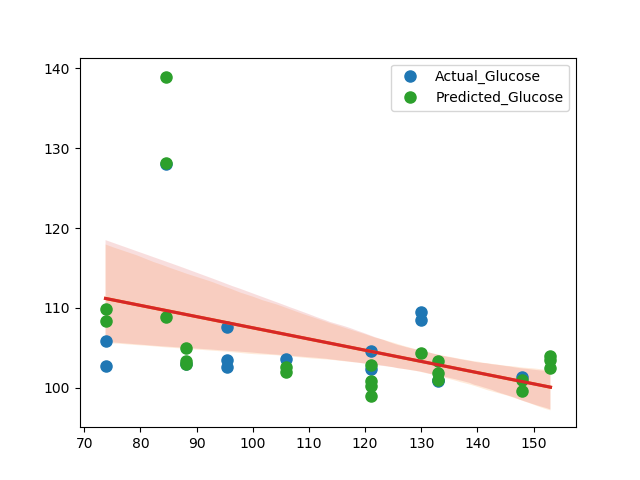

In [240]:
### Graph Plot
%matplotlib notebook
# Generate Data
num = 38


x= truey.flatten()
y= prediction.flatten()

labels = np.random.choice(['Actual_Glucose', 'Predicted_Glucose'], num)
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, label=name)
    ax = sns.regplot(x=x, y=y, data=df)
ax.legend()
plt.show()
#plt.savefig('data_mat/regression_new.png')

In [216]:
d1 = pd.DataFrame({'Real Values':truey.reshape(-1), 'Predicted Values':prediction, 'labels':labels})
d1.to_csv("RFR.csv")